In [1]:
import numpy as np
from scipy import stats


In [2]:
x = np.array([69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76])
y = np.array([153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220])

In [3]:
x_mean = np.mean(x)
x_median = np.median(x)
x_mode = stats.mode(x)
print(f'x -> mean {x_mean}, median {x_median} mode {x_mode}')

y_mean = np.mean(y)
y_median = np.median(y)
y_mode = stats.mode(y)
print(f'y -> mean {y_mean}, median {y_median} mode {y_mode}')


x -> mean 71.45, median 71.5 mode ModeResult(mode=array([74]), count=array([3]))
y -> mean 164.7, median 154.0 mode ModeResult(mode=array([140]), count=array([2]))


In [4]:
x_var = np.var(x)
y_var = np.var(y)
print(f'x variance {x_var}')
print(f'y variance {y_var}')

x variance 13.847500000000002
y variance 1369.2099999999998


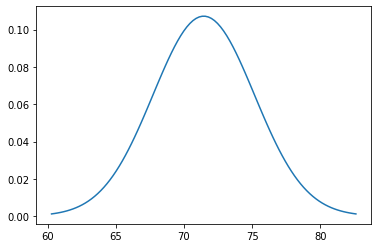

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

x_sigma = math.sqrt(x_var)
x_coord = np.linspace(x_mean - 3*x_sigma, x_mean + 3*x_sigma, 100)
plt.plot(x_coord, stats.norm.pdf(x_coord, x_mean, x_sigma))
plt.show()

In [6]:
np.where(x >= 80)

(array([], dtype=int64),)

In [7]:
d = np.column_stack((x, y))
cov_x_y = np.cov(d, rowvar=False)
print(f'covariance matrix with x and y attributes \n {cov_x_y}')
mean_2d = np.mean(d, axis=0)
print(f'mean vector \n {mean_2d}')

covariance matrix with x and y attributes 
 [[  14.57631579  128.87894737]
 [ 128.87894737 1441.27368421]]
mean vector 
 [ 71.45 164.7 ]


In [8]:
corr_x_y = np.corrcoef(d, rowvar=False)
print(f'correalation between x and y \n {corr_x_y}')

correalation between x and y 
 [[1.         0.88917014]
 [0.88917014 1.        ]]


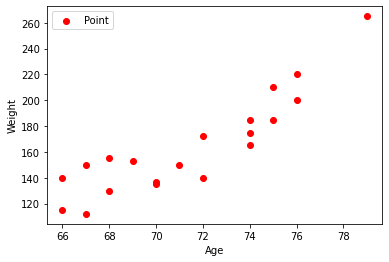

In [9]:
plt.scatter(x, y, color='red', marker='o', label='Point')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(loc='upper left')
plt.show()

In [10]:
x = np.array([[17, 17, 12], [11, 9, 13], [11, 8, 19]])
cov_x = np.cov(x, rowvar=False)
generalized_variance = np.abs(np.linalg.det(x))
print(f'covariance of x \n {cov_x} \n generalized variance of x \n {generalized_variance}')

covariance of x 
 [[ 12.          17.          -8.        ]
 [ 17.          24.33333333 -12.83333333]
 [ -8.         -12.83333333  14.33333333]] 
 generalized variance of x 
 115.00000000000001


In [11]:
# ******************* EXAMPLE 3.8 *******************
p1 = np.array([0.3, 0.333, 0.287, 0.8])
sigma11 = np.diag(p1) - np.outer(p1, p1[np.newaxis])
print(f'sigma11 \n {sigma11}')
p2 = np.array([0.313, 0.587, 0.1])
sigma22 = np.diag(p2) - np.outer(p2, p2[np.newaxis])
print(f'sigma22 \n {sigma22}')
p12 = np.array([[0.047, 0.22, 0.033], [0.16, 0.12, 0.053], [0.087, 0.2, 0.0], [0.02, 0.047, 0.013]])
sigma12 = p12 - np.outer(p1, p2[np.newaxis])
print(f'sigma12 \n {sigma12}')

sigma11 
 [[ 0.21     -0.0999   -0.0861   -0.24    ]
 [-0.0999    0.222111 -0.095571 -0.2664  ]
 [-0.0861   -0.095571  0.204631 -0.2296  ]
 [-0.24     -0.2664   -0.2296    0.16    ]]
sigma22 
 [[ 0.215031 -0.183731 -0.0313  ]
 [-0.183731  0.242431 -0.0587  ]
 [-0.0313   -0.0587    0.09    ]]
sigma12 
 [[-0.0469    0.0439    0.003   ]
 [ 0.055771 -0.075471  0.0197  ]
 [-0.002831  0.031531 -0.0287  ]
 [-0.2304   -0.4226   -0.067   ]]


In [12]:
A1 = np.array([8, 0, 10, 10, 2])
A2 = np.array([-20, -1, -19, -20, 0])
D = np.array([[8, -20], [0, -1], [10, 19], [10, -20], [2, 0]])
D_mean = np.mean(D, axis=0)
Sigma = np.cov(D - D_mean, rowvar=False)
print(f'Covariance matrix \n {Sigma}')

Covariance matrix 
 [[ 22.   -9.5]
 [ -9.5 266.3]]


In [13]:
e_values, e_vectors = np.linalg.eig(Sigma)
print(f'eigenvalues \n {e_values}')
print(f'eigenvectors \n {e_vectors}')

eigenvalues 
 [ 21.63113411 266.66886589]
eigenvectors 
 [[-0.99924704  0.03879875]
 [-0.03879875 -0.99924704]]


In [14]:
new_x0 = np.dot(e_vectors.transpose(), (D - D_mean)[0])
new_x1 = np.dot(e_vectors.transpose(), (D - D_mean)[1])
new_x2 = np.dot(e_vectors.transpose(), (D - D_mean)[2])
new_x3 = np.dot(e_vectors.transpose(), (D - D_mean)[3])
new_x4 = np.dot(e_vectors.transpose(), (D - D_mean)[4])
new_D = np.stack((new_x0, new_x1, new_x2, new_x3, new_x4))
new_D_mean = np.mean(new_D, axis=0)
new_Sigma = np.cov(new_D - new_D_mean, rowvar=False)
new_e_values, new_e_vectors = np.linalg.eig(new_Sigma)

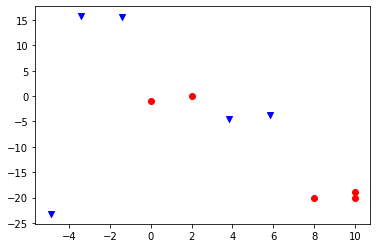

In [15]:
plt.scatter(A1, A2, color='red', marker='o', label='Point')
plt.scatter(new_D[:, 0], new_D[:, 1], color='blue', marker='v', label='x')
plt.show()

In [16]:
from scipy.stats import multivariate_normal


def gauss2d(mu, sigma, to_plot=False):
    w, h = 100, 100

    std = [np.sqrt(sigma[0, 0]), np.sqrt(sigma[1, 1])]
    x = np.linspace(mu[0] - 3 * std[0], mu[0] + 3 * std[0], w)
    y = np.linspace(mu[1] - 3 * std[1], mu[1] + 3 * std[1], h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z = z.reshape(w, h, order='F')

    if to_plot:
        plt.contourf(x, y, z.T)
        plt.scatter(A1, A2, color='red', marker='o', label='Point')
        plt.show()

    return z

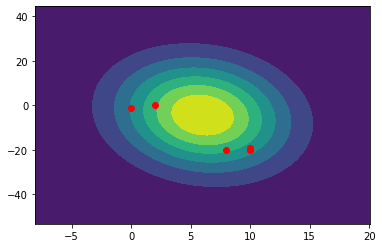

In [17]:
z = gauss2d(D_mean, Sigma, True)

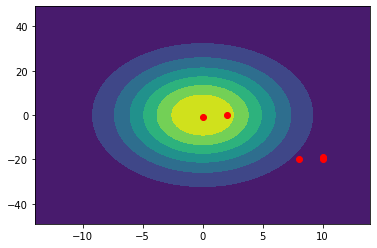

array([[2.58609213e-07, 3.09605754e-07, 3.69299610e-07, ...,
        3.69299610e-07, 3.09605754e-07, 2.58609213e-07],
       [3.09605754e-07, 3.70658577e-07, 4.42123786e-07, ...,
        4.42123786e-07, 3.70658577e-07, 3.09605754e-07],
       [3.69299610e-07, 4.42123786e-07, 5.27367918e-07, ...,
        5.27367918e-07, 4.42123786e-07, 3.69299610e-07],
       ...,
       [3.69299610e-07, 4.42123786e-07, 5.27367918e-07, ...,
        5.27367918e-07, 4.42123786e-07, 3.69299610e-07],
       [3.09605754e-07, 3.70658577e-07, 4.42123786e-07, ...,
        4.42123786e-07, 3.70658577e-07, 3.09605754e-07],
       [2.58609213e-07, 3.09605754e-07, 3.69299610e-07, ...,
        3.69299610e-07, 3.09605754e-07, 2.58609213e-07]])

In [18]:
gauss2d(new_D_mean, new_Sigma, True)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
D = np.array([[8, -20], [0, -1], [10, 19], [10, -20], [2, 0]])
pca.fit(D)
print(pca.explained_variance_ratio_)

[0.92497005 0.07502995]


In [20]:
sigma = np.array([[5, 4], [4, 5]])
e_values, e_vectors = np.linalg.eig(sigma)
print(f'eigenvalues \n {e_values}')
print(f'eigenvectors \n {e_vectors}')

eigenvalues 
 [9. 1.]
eigenvectors 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [21]:
data = np.array([[1, 1, 0], [0, 0, 1]])
l, s, r = np.linalg.svd(data)
print(l)
print(s)
print(r)

[[1. 0.]
 [0. 1.]]
[1.41421356 1.        ]
[[ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.        ]]


In [22]:
Data = np.array([[4, 2.9], [2.5, 1], [3.5, 4], [2, 2.1]])
K = np.ones((4, 4))
K[0][0] = np.dot(Data[0], Data[0])
K[0][1] = np.dot(Data[0], Data[1])
K[1][0] = np.dot(Data[0], Data[1])
K[0][2] = np.dot(Data[0], Data[2])
K[2][0] = np.dot(Data[0], Data[2])
K[0][3] = np.dot(Data[0], Data[3])
K[3][0] = np.dot(Data[0], Data[3])
K[1][1] = np.dot(Data[1], Data[1])
K[1][2] = np.dot(Data[1], Data[2])
K[2][1] = np.dot(Data[2], Data[1])
K[1][3] = np.dot(Data[1], Data[3])
K[3][1] = np.dot(Data[1], Data[3])
K[2][2] = np.dot(Data[2], Data[2])
K[2][3] = np.dot(Data[2], Data[3])
K[3][2] = np.dot(Data[3], Data[2])
K[3][3] = np.dot(Data[3], Data[3])

In [23]:

K_hat = np.matmul(np.matmul(np.identity(4) - 0.25 * np.ones((4, 4)), K), np.identity(4) - 0.25 * np.ones((4, 4)))

In [24]:
e_values, e_vectors = np.linalg.eig(K_hat)
print(f'eigenvalues \n {e_values}')
print(f'eigenvectors \n {e_vectors}')

eigenvalues 
 [ 6.23596584e+00  1.08403416e+00 -3.38676424e-16 -2.15906486e-15]
eigenvectors 
 [[-0.34634043 -0.61648058 -0.48686194  0.68463649]
 [ 0.61648058 -0.34634043 -0.51280157 -0.17684141]
 [-0.61648058  0.34634043 -0.51280157 -0.17684141]
 [ 0.34634043  0.61648058 -0.48686194  0.68463649]]


In [25]:
Data = np.array([[1, 2], [2, 1]])
K = np.ones((2, 2))
K[0][0] = np.dot(Data[0], Data[0]) * np.dot(Data[0], Data[0])
K[0][1] = np.dot(Data[0], Data[1]) * np.dot(Data[0], Data[1])
K[1][0] = np.dot(Data[0], Data[1]) * np.dot(Data[0], Data[1])
K[1][1] = np.dot(Data[1], Data[1]) * np.dot(Data[1], Data[1])
K_hat = np.matmul(np.matmul(np.identity(2) - 0.5 * np.ones((2, 2)), K), np.identity(2) - 0.5 * np.ones((2, 2)))

In [26]:
e_values, e_vectors = np.linalg.eig(K_hat)
print(f'eigenvalues \n {e_values}')
print(f'eigenvectors \n {e_vectors}')

eigenvalues 
 [ 9.0000000e+00 -8.8817842e-16]
eigenvectors 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [27]:
###################

In [28]:
import numpy as np
d = np.array([0.0, 0.153, 0.077, 0.153, 0.077, 0.23])
print('meann: ', d.mean())
print('std: ', d.std())
l = d.mean() - 1.15 * d.std()
r = d.mean() + 1.15 * d.std()
print('[', l, ',', r, ']')

meann:  0.115
std:  0.07328710664230101
[ 0.030719827361353855 , 0.19928017263864617 ]


In [63]:
X = np.array([[0.5, 4.5, 2.5], 
              [2.2, 1.5, 0.1], 
              [3.9, 3.5, 1.1], 
              [2.1, 1.9, 4.9], 
              [0.5, 3.2, 1.2], 
              [0.8, 4.3, 2.6], 
              [2.7, 1.1, 3.1], 
              [2.5, 3.5, 2.8], 
              [2.8, 3.9, 1.5], 
              [0.1, 4.1, 2.9]])
mu1 = np.array([0.5, 4.5, 2.5])
mu2 = np.array([2.5, 2.0, 1.5])

cluster1 = []
cluster2 = []

def dist (a, b):
    return np.linalg.norm(a-b)

for i in range(10):
    if dist(X[i], mu1) >= dist(X[i], mu2):
        cluster1.append(i)
    else:
        cluster2.append(i)
        
print(cluster1)
print(cluster2)
p_c1 = 3.0/4
p_c2 = 1 - p_c1
print(p_c1, p_c2)
X1 = X[cluster1, :]
X2 = X[cluster2, :]
cov1 = np.cov(X1, rowvar=False)
cov2 = np.cov(X2, rowvar=False)

from scipy.stats import multivariate_normal

x11 = multivariate_normal.pdf(X[8, :], mu1, cov1) * p_c1
x12 = multivariate_normal.pdf(X[8, :], mu2, cov2) * p_c2

PC1 = x11 / (x11 + x12)
PC1

[1, 2, 3, 6, 7, 8]
[0, 4, 5, 9]
0.75 0.25


0.9999999980313337

In [66]:
X = np.array([[0.4, 0.9, 0.6], [0.5, 0.1, 0.6], [0.6, 0.3, 0.6], [0.4, 0.8, 0.5]])

K = np.empty((4, 4))
for i in range(4):
    for j in range(4):
        K[i, j] = 1 + np.dot(X[i, :], X[j, :])
        
print(K)
cluster1 = [0, 1]
cluster2 = [2, 3]

[[2.33 1.65 1.87 2.18]
 [1.65 1.62 1.69 1.58]
 [1.87 1.69 1.81 1.78]
 [2.18 1.58 1.78 2.05]]
